In [1]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


%load_ext autoreload
%autoreload 2


print("Done")

Done


# IO

In [7]:
case = Load.case_2D(
    r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\06", 
    r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\compass-wide-68x96-cellcorners.grd.nc",
    # r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\compass-wide-68x96.grd.nc",
    double_load = False, keep_xboundaries = True, keep_yboundaries = True)

True
True


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:753: UserWarning: Trying to open a large number of files - setting xarray's `file_cache_maxsize` global option to 192 to accommodate this. Recommend using `xr.set_options(file_cache_maxsize=NUM)` to explicitly set this to a large enough value.
  warn(


ValueError: conflicting sizes for dimension 'y': length 96 on 'psixy' and length 100 on {'x': 'Bxy', 'y': 'Bxy', 't': 'Dnnd', 'z': 'Dnnd'}

In [39]:
ds = xbout.load.open_boutdataset(
                datapath = datapath, 
                inputfilepath = inputfilepath, 
                gridfilepath = gridfilepath,
                info = False,
                geometry = "toroidal",
                cache = False,
                keep_xboundaries=xboundaries,
                keep_yboundaries=yboundaries,
                )

0

In [6]:
ds = case.ds

new = ds["Ne"].bout.interpolate_to_new_grid(
    r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\compass-wide-136x192-cellcorners.grd.nc",
    return_dataset = True
)

ValueError: A value (0.00013556974448525764) in x_new is below the interpolation range's minimum value (0.00024688863950891475).

In [42]:

new_gridfile = xbout.load.open_boutdataset(
                r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\compass-wide-136x192-cellcorners.grd.nc",
                keep_xboundaries=True,
                keep_yboundaries=False,
                drop_variables=["theta"],
                info=False,
                geometry=ds.geometry,
            )

C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\boutdataarray.py:29: AccessorRegistrationWarning: registration of accessor <class 'xbout.boutdataarray.BoutDataArrayAccessor'> under name 'bout' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  class BoutDataArrayAccessor:


In [44]:
new_gridfile.keys()

KeysView(<xarray.Dataset>
Dimensions:                  (x: 136, theta: 176)
Coordinates:
    R                        (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    Z                        (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    psi_poloidal             (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    dx                       (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    poloidal_distance        (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    poloidal_distance_ylow   (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    zShift                   (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    zShift_CELL_YLOW         (x, theta) float64 dask.array<chunksize=(136, 176), meta=np.ndarray>
    total_poloidal_distance  

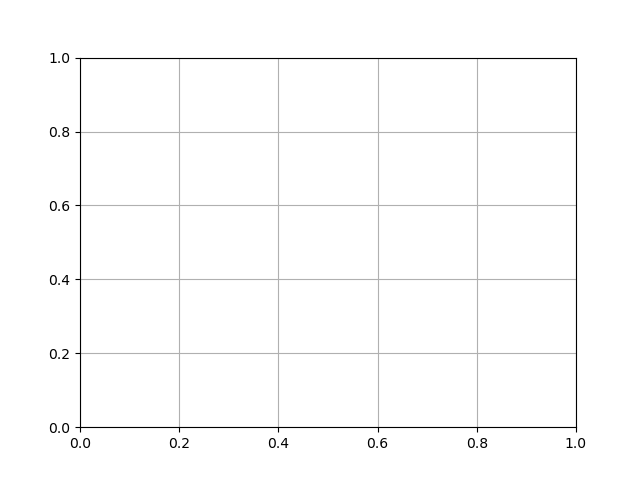

In [16]:
fig, ax = plt.subplots()
ax.grid()

In [1]:
%matplotlib widget

In [6]:
np.linspace(0,1,1).data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


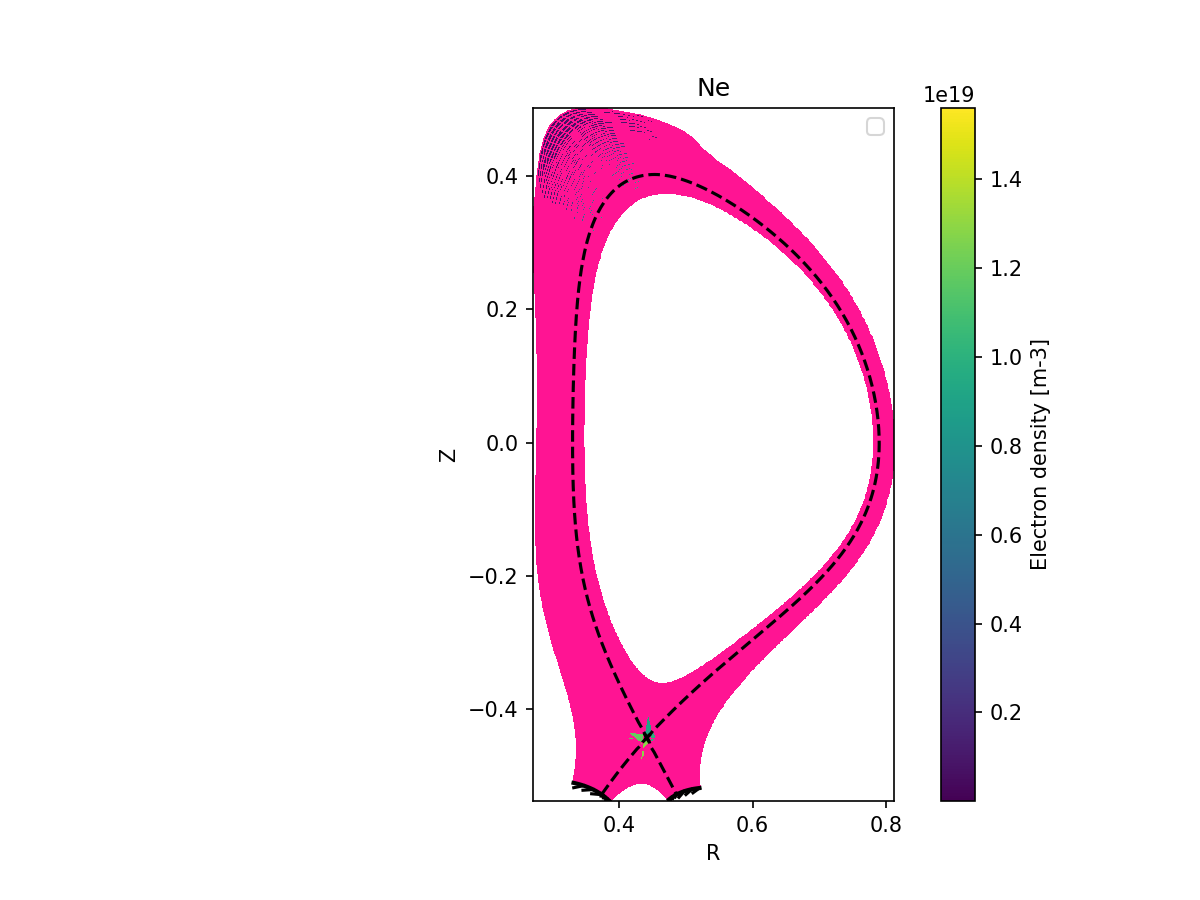

In [8]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 150)
# case.ds["Ne"].isel(t=-1).bout.interpolate_parallel(n=10, method = "linear").bout.polygon(
#     cmap = "viridis", ax = ax, antialias = True, 
#     separatrix = True, targets = True,
#     linewidth = 0.5,
#     linecolor = "deeppink"
#     )

case.ds["Ne"].isel(t=-1).bout.interpolate_parallel(n=10).bout.pcolormesh(
    cmap = "viridis", ax = ax, 
    separatrix = True, targets = True,
    linewidth = 0.01,
    color = "deeppink"
    )
# s = 50
# ax.scatter(case.ds.coords["R"], case.ds.coords["Z"], s = 2, c = "deeppink")
# ax.scatter(case.ds.coords["Rxy_lower_left_corners"], case.ds.coords["Zxy_lower_left_corners"], marker = "x", s = s, color = "green", label = "Lower left")
# ax.scatter(case.ds.coords["Rxy_lower_right_corners"], case.ds.coords["Zxy_lower_right_corners"], marker = "x", s = s, color = "red", label = "Lower right")
# ax.scatter(case.ds.coords["Rxy_upper_left_corners"], case.ds.coords["Zxy_upper_left_corners"], marker = "+", s = s, color = "green", label = "Upper left")
# ax.scatter(case.ds.coords["Rxy_upper_right_corners"], case.ds.coords["Zxy_upper_right_corners"], marker = "+", s = s, color = "red", label = "Upper right")
# ax.scatter(case.ds["Rxy_"], case.ds["Z"], s = 2, c = "deeppink")

# ax.set_xlim(0.25, 0.55)
# ax.set_ylim(0.25, 0.55)
ax.legend()
# case.ds["Ne"].isel(t=-1).bout.pcolormesh(cmap = "viridis", ax = ax, separatrix = True, targets = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


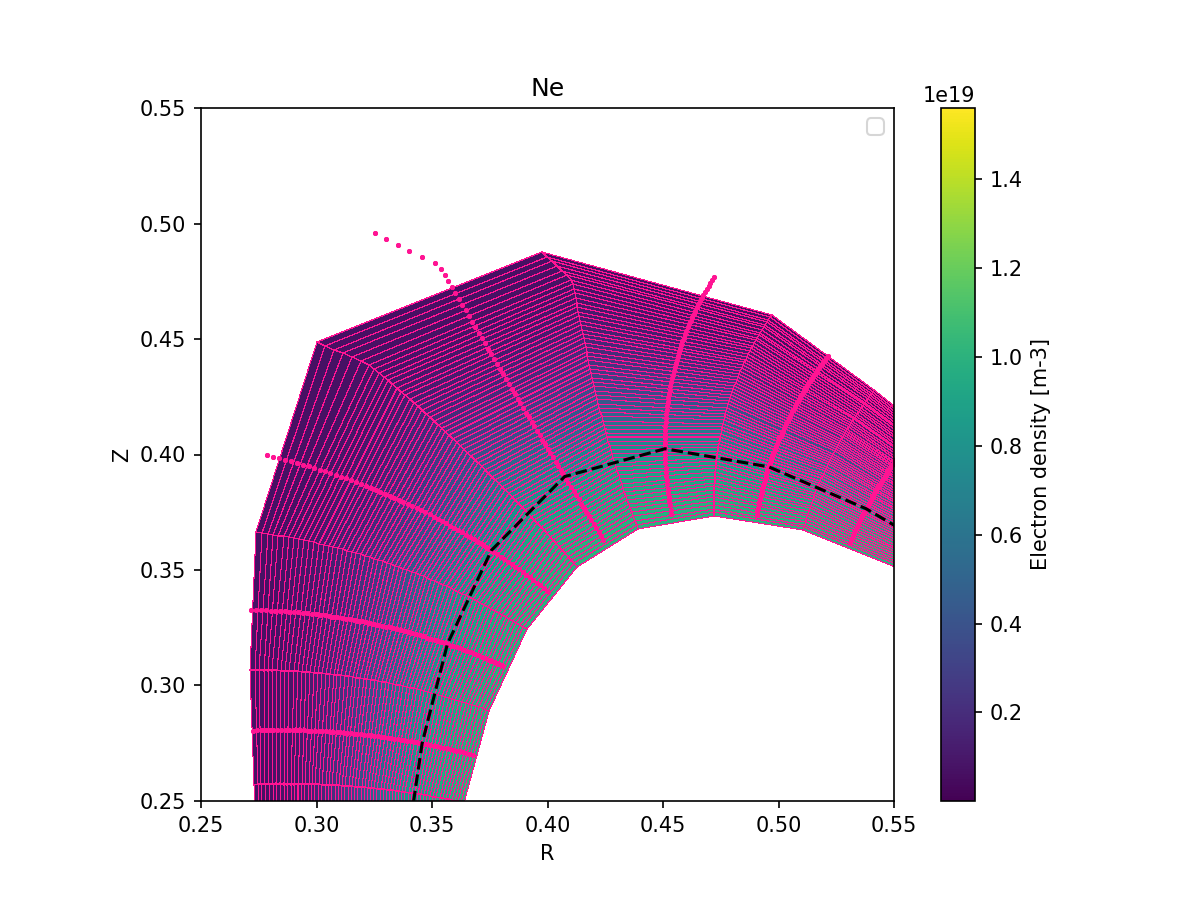

In [14]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 150)
# case.ds["Ne"].isel(t=-1).bout.interpolate_parallel(n=10, method = "linear").bout.polygon(
#     cmap = "viridis", ax = ax, antialias = True, 
#     separatrix = True, targets = True,
#     linewidth = 0.5,
#     linecolor = "deeppink"
#     )

# data = case.ds["Ne"].isel(t=-1).bout.interpolate_parallel(n=10)
data = case.ds["Ne"].isel(t=-1)
data.bout.pcolormesh(
    cmap = "viridis", ax = ax, 
    separatrix = True, targets = True,
    linewidth = 0.01,
    color = "deeppink"
    )
# s = 50
ax.scatter(case.ds.coords["R"], case.ds.coords["Z"], s = 2, c = "deeppink")
ax.scatter(case.ds["R"], case.ds["Z"], s = 2, c = "deeppink")
# ax.scatter(case.ds.coords["Rxy_lower_left_corners"], case.ds.coords["Zxy_lower_left_corners"], marker = "x", s = s, color = "green", label = "Lower left")
# ax.scatter(case.ds.coords["Rxy_lower_right_corners"], case.ds.coords["Zxy_lower_right_corners"], marker = "x", s = s, color = "red", label = "Lower right")
# ax.scatter(case.ds.coords["Rxy_upper_left_corners"], case.ds.coords["Zxy_upper_left_corners"], marker = "+", s = s, color = "green", label = "Upper left")
# ax.scatter(case.ds.coords["Rxy_upper_right_corners"], case.ds.coords["Zxy_upper_right_corners"], marker = "+", s = s, color = "red", label = "Upper right")
# ax.scatter(case.ds["Rxy_"], case.ds["Z"], s = 2, c = "deeppink")

ax.set_xlim(0.25, 0.55)
ax.set_ylim(0.25, 0.55)
ax.legend()
# case.ds["Ne"].isel(t=-1).bout.pcolormesh(cmap = "viridis", ax = ax, separatrix = True, targets = True)

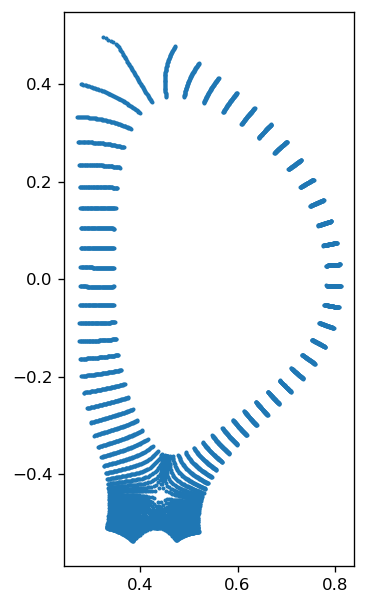

In [84]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 120)
ds = case.ds
R = ds.coords["R"]
Z = ds.coords["Z"]

ax.scatter(R, Z, s = 2)
ax.set_aspect("equal")


In [82]:
data = R.data
new = np.resize(data, (data.shape[0], data.shape[1]*2))
new.shape
# scipy.interpolate.LinearNDInterpolator(R)

(64, 192)

In [78]:
fit = scipy.interpolate.interp1d(R[0,:].shape

(96,)

In [74]:
R.shape

(64, 96)

In [ ]:
"""
Power out through X outer Pout,x 0.0 W [0.0 ion 0.0 electron]
Power out through lower sheath: Pout,d = 41805.580325914736 W [25543.116778984073 ion 16262.463546930667 electron]
Power out through upper sheath: Pout,u = 85927.55896679485 W [40862.03993701901 ion 45065.51902977584 electron]
Domain volume: 0.44588748805918543 m^3
Thermal energy content: 49.51050515563746 J
Energy confinement time: 0.00030483209701806415 s
Net power radiation: Prad = 26396.319077657958 W [26395.075399576534 excitation 1.2436780814237998 recombination]
Net input power Pnet = Pin - Pout,x - Pout,d - Pout,u - Prad = 8289.4786115327 W
Particle flux in through X inner: 4.149953576517765e+19 /s
Particle flux out through X outer: 0.0 /s
Particle flux to lower sheath: 2.0381675806634667e+21 /s
Particle flux to upper sheath: 2.2985141232757716e+21 /s
Recycling fraction: 0.990430578354994
Total ionization rate: 4.290451033846074e+21 /s
Total recombination rate: -2.5038401874305984e+17 /s
Particle content: 2.169621801152505e+18
Particle throughput time: 0.05228062823230518 s
"""

In [ ]:
case.ds = calculate_fluxes(ds)

## Time evolution on first ring

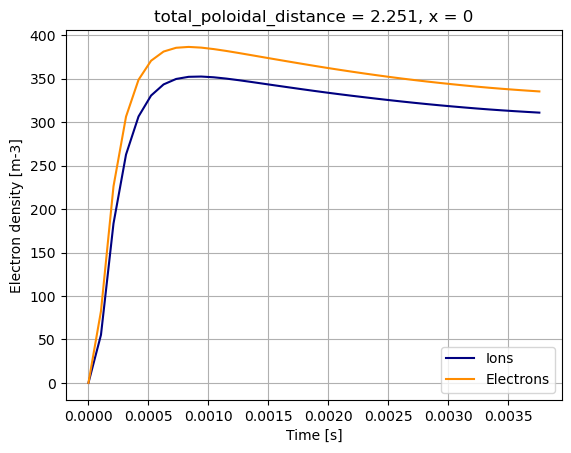

In [41]:
fig, ax = plt.subplots()

(ds["hf_perp_tot_R_d+"].sum("theta").isel(x = 0) /1e6).plot(ax = ax, c = "navy", label = "Ions")
(ds["hf_perp_tot_R_e"].sum("theta").isel(x = 0) /1e6).plot(ax = ax, c = "darkorange", label = "Electrons")
# convective_heat_flux[1].sum("theta").isel(x = 3).plot(ax = ax, c = "darkorange", label = "convective")
# total_heat_flux.sum("theta").isel(x = 3).plot(ax = ax, c = "deeppink", label = "total")

ax.legend()
ax.grid()